In [1]:
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import seaborn as sns
from scipy.stats import shapiro, skew, kurtosis
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import power_transform

C:\Users\User\AppData\Local\Temp\ipykernel_33476\1517585587.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('bodies_dataset.csv')

In [3]:
df.columns

Index(['bia_di', 'bii_di', 'bit_di', 'che_de', 'che_di', 'elb_di', 'wri_di',
       'kne_di', 'ank_di', 'sho_gi', 'che_gi', 'wai_gi', 'nav_gi', 'hip_gi',
       'thi_gi', 'bic_gi', 'for_gi', 'kne_gi', 'cal_gi', 'ank_gi', 'wri_gi',
       'age', 'wgt', 'hgt', 'sex'],
      dtype='object')

In [4]:
df['sex'].value_counts()

sex
0    260
1    247
Name: count, dtype: int64

In [34]:
# Check for normal distribution using histogram + kde + rug

fig = ff.create_distplot(hist_data=[df[(df['sex'] == 1)].hgt,
                                    df[(df['sex'] == 0)].hgt,
                                    df.hgt],
                         group_labels=['Male height', 'Female height', 'All height'],
                         colors=['blue', 'red', 'green'],
                         bin_size=3, 
                        show_rug=True)
fig.show()
# While histogram is not really close to nornal distribution, kde is really close to normal

In [6]:
# Shapiro-Wilk test
shapiro_result = shapiro(df.hgt)
print(f'Human height is distributed {'not ' if shapiro_result.pvalue < 0.05 else 'mightly '}normally')
shapiro_result_male = shapiro(df[(df['sex'] == 1)].hgt)
print(f'Man height is distributed {'not ' if shapiro_result_male.pvalue < 0.05 else 'mightly '}normally')
shapiro_result_female = shapiro(df[(df['sex'] == 0)].hgt)
print(f'Woman height is distributed {'not ' if shapiro_result_female.pvalue < 0.05 else 'mightly '}normally')
# Actually, Shapiro-Wilk test is arguable

Human height is distributed not normally
Man height is distributed mightly normally
Woman height is distributed mightly normally


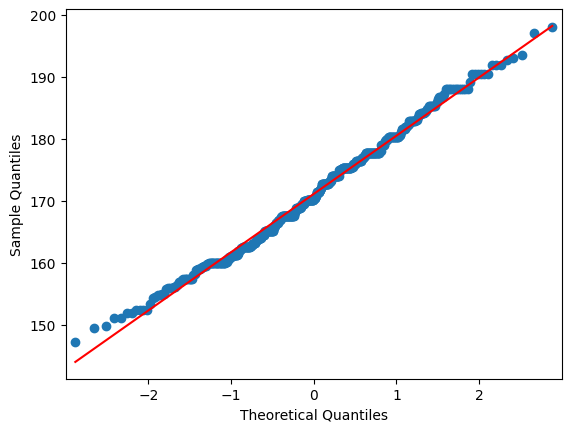

In [7]:
# QQ-Plot for human height

qq = qqplot(df.hgt, line='s').gca().lines
x_qq = qq[0].get_xdata()
y_qq = qq[0].get_ydata()
tx_qq = qq[1].get_xdata()
ty_qq = qq[1].get_ydata()

fig = go.Figure()
fig.add_trace(
    go.Scatter(x=x_qq, y=y_qq, mode='markers')
)
fig.add_trace(
    go.Scatter(x=tx_qq, y=ty_qq, mode='lines')
)
fig.update_layout({
    'title': 'Quantile-Quantile Plot',
    'xaxis': {
        'title': 'Theoritical Quantities',
        'zeroline': False
    },
    'yaxis': {
        'title': 'Sample Quantities'
    },
    'showlegend': False,
    'width': 800,
    'height': 700,
})
fig.show()

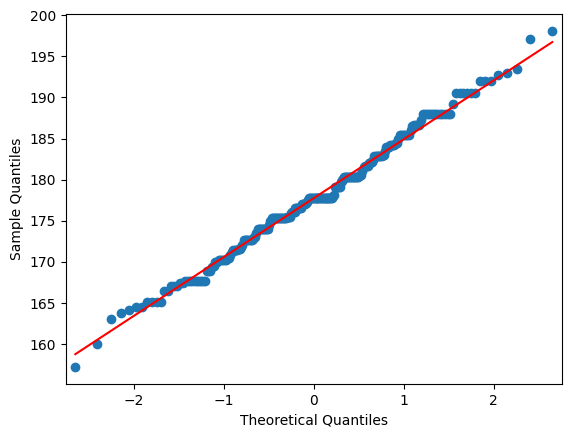

In [8]:
# QQ-Plot for male height

qq = qqplot(df[df.sex == 1].hgt, line='s').gca().lines
x_qq = qq[0].get_xdata()
y_qq = qq[0].get_ydata()
tx_qq = qq[1].get_xdata()
ty_qq = qq[1].get_ydata()

fig = go.Figure()
fig.add_trace(
    go.Scatter(x=x_qq, y=y_qq, mode='markers')
)
fig.add_trace(
    go.Scatter(x=tx_qq, y=ty_qq, mode='lines')
)
fig.update_layout({
    'title': 'Quantile-Quantile Plot',
    'xaxis': {
        'title': 'Theoritical Quantities',
        'zeroline': False
    },
    'yaxis': {
        'title': 'Sample Quantities'
    },
    'showlegend': False,
    'width': 800,
    'height': 700,
})
fig.show()

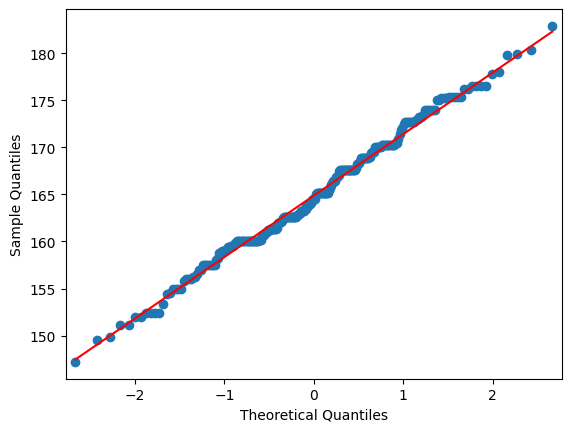

In [9]:
# QQ-Plot for female height

qq = qqplot(df[df.sex == 0].hgt, line='s').gca().lines
x_qq = qq[0].get_xdata()
y_qq = qq[0].get_ydata()
tx_qq = qq[1].get_xdata()
ty_qq = qq[1].get_ydata()

fig = go.Figure()
fig.add_trace(
    go.Scatter(x=x_qq, y=y_qq, mode='markers')
)
fig.add_trace(
    go.Scatter(x=tx_qq, y=ty_qq, mode='lines')
)
fig.update_layout({
    'title': 'Quantile-Quantile Plot',
    'xaxis': {
        'title': 'Theoritical Quantities',
        'zeroline': False
    },
    'yaxis': {
        'title': 'Sample Quantities'
    },
    'showlegend': False,
    'width': 800,
    'height': 700,
})
fig.show()

In [10]:
# Skewness for human height
hgt_skewness = skew(df.hgt)
hgt_excess = kurtosis(df.hgt, fisher=True)
# Excess kurtosis = Kurtosis - 3 (excess for normal distribution is 0)
# Excess kurtosis = Fisher's kurtosis
print(f'''
Human height skewness = {hgt_skewness}
Human height have {dict([
    (hgt_skewness > 0, 'Right Skewness'),
    (hgt_skewness < 0, 'Left Skewness'),
    (hgt_skewness == 0, 'Symmetry')
])[True]}
Human height excess kurtosis = {hgt_excess}
Kurtosis distribution is {dict([(hgt_excess > 0, 'Leptocurtic'),
                               (hgt_excess == 0, 'Mesocurtic'),
                               (hgt_excess < 0, 'Platycurtic')])[True]}
''')


Human height skewness = 0.1516347374686604
Human height have Right Skewness
Human height excess kurtosis = -0.4499739187723848
Kurtosis distribution is Platycurtic



In [11]:
# Skewness for male height
hgt_skewness = skew(df[df.sex == 1].hgt)
hgt_excess = kurtosis(df[df.sex == 1].hgt, fisher=True)
# Excess kurtosis = Kurtosis - 3 (excess for normal distribution is 0)
# Excess kurtosis = Fisher's kurtosis
print(f'''
Male height skewness = {hgt_skewness}
Male height have {dict([
    (hgt_skewness > 0, 'Right Skewness'),
    (hgt_skewness < 0, 'Left Skewness'),
    (hgt_skewness == 0, 'Symmetry')
])[True]}
Male height excess kurtosis = {hgt_excess}
Kurtosis distribution is {dict([(hgt_excess > 0, 'Leptocurtic'),
                               (hgt_excess == 0, 'Mesocurtic'),
                               (hgt_excess < 0, 'Platycurtic')])[True]}
''')


Male height skewness = 0.10352893800778205
Male height have Right Skewness
Male height excess kurtosis = -0.13617106084190045
Kurtosis distribution is Platycurtic



In [12]:
# Skewness for female height
hgt_skewness = skew(df[df.sex == 0].hgt)
hgt_excess = kurtosis(df[df.sex == 0].hgt, fisher=True)
# Excess kurtosis = Kurtosis - 3 (excess for normal distribution is 0)
# Excess kurtosis = Fisher's kurtosis
print(f'''
Female height skewness = {hgt_skewness}
Female height have {dict([
    (hgt_skewness > 0, 'Right Skewness'),
    (hgt_skewness < 0, 'Left Skewness'),
    (hgt_skewness == 0, 'Symmetry')
])[True]}
Female height excess kurtosis = {hgt_excess}
Kurtosis distribution is {dict([(hgt_excess > 0, 'Leptocurtic'),
                               (hgt_excess == 0, 'Mesocurtic'),
                               (hgt_excess < 0, 'Platycurtic')])[True]}
''')


Female height skewness = 0.06573925739518308
Female height have Right Skewness
Female height excess kurtosis = -0.2987387068771148
Kurtosis distribution is Platycurtic



In [13]:
# Log Normalization
hgt_log = np.log(df.hgt)
male_hgt_log = np.log(df[df.sex == 1].hgt)
female_hgt_log = np.log(df[df.sex == 0].hgt)

fig = ff.create_distplot(hist_data=[male_hgt_log,
                                    female_hgt_log,
                                    hgt_log],
                         group_labels=['Male height Log', 'Female height Log', 'All height Log'],
                         colors=['blue', 'red', 'green'],
                         bin_size=0.01, show_rug=True)
fig.show()

In [14]:
# Skewness for human height (Log)
hgt_skewness_log = skew(hgt_log)
hgt_excess_log = kurtosis(hgt_log, fisher=True)
# Excess kurtosis = Kurtosis - 3 (excess for normal distribution is 0)
# Excess kurtosis = Fisher's kurtosis
print(f'''
Human height (Log) skewness = {hgt_skewness_log}
Human height (Log) have {dict([
    (hgt_skewness_log > 0, 'Right Skewness'),
    (hgt_skewness_log < 0, 'Left Skewness'),
    (hgt_skewness_log == 0, 'Symmetry')
])[True]}
Human height (Log) excess kurtosis = {hgt_excess_log}
Kurtosis distribution is {dict([(hgt_excess_log > 0, 'Leptocurtic'),
                               (hgt_excess_log == 0, 'Mesocurtic'),
                               (hgt_excess_log < 0, 'Platycurtic')])[True]}
''')


Human height (Log) skewness = 0.026607092696026128
Human height (Log) have Right Skewness
Human height (Log) excess kurtosis = -0.48095559124028897
Kurtosis distribution is Platycurtic



In [15]:
# Skewness for human height (Log)
hgt_skewness_log = skew(hgt_log)
hgt_excess_log = kurtosis(hgt_log, fisher=True)
# Excess kurtosis = Kurtosis - 3 (excess for normal distribution is 0)
# Excess kurtosis = Fisher's kurtosis
print(f'''
Human height (Log) skewness = {hgt_skewness_log}
Human height (Log) have {dict([
    (hgt_skewness_log > 0, 'Right Skewness'),
    (hgt_skewness_log < 0, 'Left Skewness'),
    (hgt_skewness_log == 0, 'Symmetry')
])[True]}
Human height (Log) excess kurtosis = {hgt_excess_log}
Kurtosis distribution is {dict([(hgt_excess_log > 0, 'Leptocurtic'),
                               (hgt_excess_log == 0, 'Mesocurtic'),
                               (hgt_excess_log < 0, 'Platycurtic')])[True]}
''')


Human height (Log) skewness = 0.026607092696026128
Human height (Log) have Right Skewness
Human height (Log) excess kurtosis = -0.48095559124028897
Kurtosis distribution is Platycurtic



In [16]:
# Skewness for human height (Log)
hgt_skewness_log = skew(hgt_log)
hgt_excess_log = kurtosis(hgt_log, fisher=True)
# Excess kurtosis = Kurtosis - 3 (excess for normal distribution is 0)
# Excess kurtosis = Fisher's kurtosis
print(f'''
Human height (Log) skewness = {hgt_skewness_log}
Human height (Log) have {dict([
    (hgt_skewness_log > 0, 'Right Skewness'),
    (hgt_skewness_log < 0, 'Left Skewness'),
    (hgt_skewness_log == 0, 'Symmetry')
])[True]}
Human height (Log) excess kurtosis = {hgt_excess_log}
Kurtosis distribution is {dict([(hgt_excess_log > 0, 'Leptocurtic'),
                               (hgt_excess_log == 0, 'Mesocurtic'),
                               (hgt_excess_log < 0, 'Platycurtic')])[True]}
''')


Human height (Log) skewness = 0.026607092696026128
Human height (Log) have Right Skewness
Human height (Log) excess kurtosis = -0.48095559124028897
Kurtosis distribution is Platycurtic



In [17]:
# Skewness for male height (Log)
hgt_skewness_log = skew(male_hgt_log)
hgt_excess_log = kurtosis(male_hgt_log, fisher=True)
# Excess kurtosis = Kurtosis - 3 (excess for normal distribution is 0)
# Excess kurtosis = Fisher's kurtosis
print(f'''
Male height (Log) skewness = {hgt_skewness_log}
Male height (Log) have {dict([
    (hgt_skewness_log > 0, 'Right Skewness'),
    (hgt_skewness_log < 0, 'Left Skewness'),
    (hgt_skewness_log == 0, 'Symmetry')
])[True]}
Male height (Log) excess kurtosis = {hgt_excess_log}
Kurtosis distribution is {dict([(hgt_excess_log > 0, 'Leptocurtic'),
                               (hgt_excess_log == 0, 'Mesocurtic'),
                               (hgt_excess_log < 0, 'Platycurtic')])[True]}
''')


Male height (Log) skewness = -0.008995665138030552
Male height (Log) have Left Skewness
Male height (Log) excess kurtosis = -0.1312952256615869
Kurtosis distribution is Platycurtic



In [18]:
# Skewness for female height (Log)
hgt_skewness_log = skew(female_hgt_log)
hgt_excess_log = kurtosis(female_hgt_log, fisher=True)
# Excess kurtosis = Kurtosis - 3 (excess for normal distribution is 0)
# Excess kurtosis = Fisher's kurtosis
print(f'''
Female height (Log) skewness = {hgt_skewness_log}
Female height (Log) have {dict([
    (hgt_skewness_log > 0, 'Right Skewness'),
    (hgt_skewness_log < 0, 'Left Skewness'),
    (hgt_skewness_log == 0, 'Symmetry')
])[True]}
Female height (Log) excess kurtosis = {hgt_excess_log}
Kurtosis distribution is {dict([(hgt_excess_log > 0, 'Leptocurtic'),
                               (hgt_excess_log == 0, 'Mesocurtic'),
                               (hgt_excess_log < 0, 'Platycurtic')])[True]}
''')


Female height (Log) skewness = -0.03601669148939697
Female height (Log) have Left Skewness
Female height (Log) excess kurtosis = -0.27409868473503085
Kurtosis distribution is Platycurtic



In [19]:
# Sqrt Normalization
hgt_sqrt = np.sqrt(df.hgt)
male_hgt_sqrt = np.sqrt(df[df.sex == 1].hgt)
female_hgt_sqrt = np.sqrt(df[df.sex == 0].hgt)

fig = ff.create_distplot(hist_data=[male_hgt_sqrt,
                                    female_hgt_sqrt,
                                    hgt_sqrt],
                         group_labels=['Male height Sqrt', 'Female height Sqrt', 'All height Sqrt'],
                         colors=['blue', 'red', 'green'],
                         bin_size=0.1, show_rug=True)
fig.show()

In [20]:
# Skewness for human height (Sqrt)
hgt_skewness_sqrt = skew(hgt_sqrt)
hgt_excess_sqrt = kurtosis(hgt_sqrt, fisher=True)
# Excess kurtosis = Kurtosis - 3 (excess for normal distribution is 0)
# Excess kurtosis = Fisher's kurtosis
print(f'''
Human height (Sqrt) skewness = {hgt_skewness_sqrt}
Human height (Sqrt) have {dict([
    (hgt_skewness_sqrt > 0, 'Right Skewness'),
    (hgt_skewness_sqrt < 0, 'Left Skewness'),
    (hgt_skewness_sqrt == 0, 'Symmetry')
])[True]}
Human height (Sqrt) excess kurtosis = {hgt_excess_sqrt}
Kurtosis distribution is {dict([(hgt_excess_sqrt > 0, 'Leptocurtic'),
                               (hgt_excess_sqrt == 0, 'Mesocurtic'),
                               (hgt_excess_sqrt < 0, 'Platycurtic')])[True]}
''')


Human height (Sqrt) skewness = 0.08908469345219079
Human height (Sqrt) have Right Skewness
Human height (Sqrt) excess kurtosis = -0.4715476102479297
Kurtosis distribution is Platycurtic



In [21]:
# Skewness for male height (Sqrt)
hgt_skewness_sqrt = skew(male_hgt_sqrt)
hgt_excess_sqrt = kurtosis(male_hgt_sqrt, fisher=True)
# Excess kurtosis = Kurtosis - 3 (excess for normal distribution is 0)
# Excess kurtosis = Fisher's kurtosis
print(f'''
Male height (Sqrt) skewness = {hgt_skewness_sqrt}
Male height (Sqrt) have {dict([
    (hgt_skewness_sqrt > 0, 'Right Skewness'),
    (hgt_skewness_sqrt < 0, 'Left Skewness'),
    (hgt_skewness_sqrt == 0, 'Symmetry')
])[True]}
Male height (Sqrt) excess kurtosis = {hgt_excess_sqrt}
Kurtosis distribution is {dict([(hgt_excess_sqrt > 0, 'Leptocurtic'),
                               (hgt_excess_sqrt == 0, 'Mesocurtic'),
                               (hgt_excess_sqrt < 0, 'Platycurtic')])[True]}
''')


Male height (Sqrt) skewness = 0.047386317649349856
Male height (Sqrt) have Right Skewness
Male height (Sqrt) excess kurtosis = -0.13865020478903434
Kurtosis distribution is Platycurtic



In [22]:
# Skewness for female height (Sqrt)
hgt_skewness_sqrt = skew(female_hgt_sqrt)
hgt_excess_sqrt = kurtosis(female_hgt_sqrt, fisher=True)
# Excess kurtosis = Kurtosis - 3 (excess for normal distribution is 0)
# Excess kurtosis = Fisher's kurtosis
print(f'''
Female height (Sqrt) skewness = {hgt_skewness_sqrt}
Female height (Sqrt) have {dict([
    (hgt_skewness_sqrt > 0, 'Right Skewness'),
    (hgt_skewness_sqrt < 0, 'Left Skewness'),
    (hgt_skewness_sqrt == 0, 'Symmetry')
])[True]}
Female height (Sqrt) excess kurtosis = {hgt_excess_sqrt}
Kurtosis distribution is {dict([(hgt_excess_sqrt > 0, 'Leptocurtic'),
                               (hgt_excess_sqrt == 0, 'Mesocurtic'),
                               (hgt_excess_sqrt < 0, 'Platycurtic')])[True]}
''')


Female height (Sqrt) skewness = 0.015050444096460872
Female height (Sqrt) have Right Skewness
Female height (Sqrt) excess kurtosis = -0.2904169496225588
Kurtosis distribution is Platycurtic



In [23]:
# Power Transformation
# Box-Cox - only positive values
# Yeo-Johnson - positibe + negative values
yeo_hgt = power_transform(np.array(df.hgt).reshape(-1, 1), method='yeo-johnson')
yeo_male_hgt = power_transform(np.array(df[df.sex == 1].hgt).reshape(-1, 1), method='yeo-johnson')
yeo_female_hgt = power_transform(np.array(df[df.sex == 0].hgt).reshape(-1, 1), method='yeo-johnson')

fig = ff.create_distplot(hist_data=[yeo_male_hgt.flatten(),
                                    yeo_female_hgt.flatten(),
                                    yeo_hgt.flatten()],
                         group_labels=['Male height Yeo', 'Female height Yeo', 'All height Yeo'],
                         colors=['blue', 'red', 'green'],
                         bin_size=0.1, show_rug=True)
fig.show()

In [24]:
# Skewness for human height Yeo
hgt_skewness_yeo = skew(yeo_hgt)[0]
hgt_excess_yeo = kurtosis(yeo_hgt, fisher=True)[0]

# Excess kurtosis = Kurtosis - 3 (excess for normal distribution is 0)
# Excess kurtosis = Fisher's kurtosis
print(f'''
Human height (Yeo) skewness = {hgt_skewness_yeo}
Human height (Yeo) have {dict([
    (hgt_skewness_yeo > 0, 'Right Skewness'),
    (hgt_skewness_yeo < 0, 'Left Skewness'),
    (hgt_skewness_yeo == 0, 'Symmetry')
])[True]}
Human height (Yeo) excess kurtosis = {hgt_excess_yeo}
Kurtosis distribution is {dict([(hgt_excess_yeo > 0, 'Leptocurtic'),
                               (hgt_excess_yeo == 0, 'Mesocurtic'),
                               (hgt_excess_yeo < 0, 'Platycurtic')])[True]}
''')


Human height (Yeo) skewness = 0.0017999705249094737
Human height (Yeo) have Right Skewness
Human height (Yeo) excess kurtosis = -0.4813538693659116
Kurtosis distribution is Platycurtic



In [25]:
# Skewness for male height Yeo
hgt_skewness_yeo = skew(yeo_male_hgt)[0]
hgt_excess_yeo = kurtosis(yeo_male_hgt, fisher=True)[0]

# Excess kurtosis = Kurtosis - 3 (excess for normal distribution is 0)
# Excess kurtosis = Fisher's kurtosis
print(f'''
Male height (Yeo) skewness = {hgt_skewness_yeo}
Male height (Yeo) have {dict([
    (hgt_skewness_yeo > 0, 'Right Skewness'),
    (hgt_skewness_yeo < 0, 'Left Skewness'),
    (hgt_skewness_yeo == 0, 'Symmetry')
])[True]}
Male height (Yeo) excess kurtosis = {hgt_excess_yeo}
Kurtosis distribution is {dict([(hgt_excess_yeo > 0, 'Leptocurtic'),
                               (hgt_excess_yeo == 0, 'Mesocurtic'),
                               (hgt_excess_yeo < 0, 'Platycurtic')])[True]}
''')


Male height (Yeo) skewness = -0.0001299904126149903
Male height (Yeo) have Left Skewness
Male height (Yeo) excess kurtosis = -0.1331323354783427
Kurtosis distribution is Platycurtic



In [26]:
# Skewness for human female Yeo
hgt_skewness_yeo = skew(yeo_female_hgt)[0]
hgt_excess_yeo = kurtosis(yeo_female_hgt, fisher=True)[0]

# Excess kurtosis = Kurtosis - 3 (excess for normal distribution is 0)
# Excess kurtosis = Fisher's kurtosis
print(f'''
Female height (Yeo) skewness = {hgt_skewness_yeo}
Female height (Yeo) have {dict([
    (hgt_skewness_yeo > 0, 'Right Skewness'),
    (hgt_skewness_yeo < 0, 'Left Skewness'),
    (hgt_skewness_yeo == 0, 'Symmetry')
])[True]}
Female height (Yeo) excess kurtosis = {hgt_excess_yeo}
Kurtosis distribution is {dict([(hgt_excess_yeo > 0, 'Leptocurtic'),
                               (hgt_excess_yeo == 0, 'Mesocurtic'),
                               (hgt_excess_yeo < 0, 'Platycurtic')])[True]}
''')


Female height (Yeo) skewness = -0.0012519715432849619
Female height (Yeo) have Left Skewness
Female height (Yeo) excess kurtosis = -0.2860849862177681
Kurtosis distribution is Platycurtic



In [27]:
# Power Transformation
# Box-Cox - only positive values
# Yeo-Johnson - positibe + negative values
box_hgt = power_transform(np.array(df.hgt).reshape(-1, 1), method='box-cox')
box_male_hgt = power_transform(np.array(df[df.sex == 1].hgt).reshape(-1, 1), method='box-cox')
box_female_hgt = power_transform(np.array(df[df.sex == 0].hgt).reshape(-1, 1), method='box-cox')

fig = ff.create_distplot(hist_data=[box_hgt.flatten(),
                                    box_male_hgt.flatten(),
                                    box_female_hgt.flatten()],
                         group_labels=['Male height Box', 'Female height Box', 'All height Box'],
                         colors=['blue', 'red', 'green'],
                         bin_size=0.1, show_rug=True)
fig.show()

In [28]:
# Skewness for human height Box
hgt_skewness_yeo = skew(box_hgt)[0]
hgt_excess_yeo = kurtosis(box_hgt, fisher=True)[0]

# Excess kurtosis = Kurtosis - 3 (excess for normal distribution is 0)
# Excess kurtosis = Fisher's kurtosis
print(f'''
Human height (Box) skewness = {hgt_skewness_yeo}
Human height (Box) have {dict([
    (hgt_skewness_yeo > 0, 'Right Skewness'),
    (hgt_skewness_yeo < 0, 'Left Skewness'),
    (hgt_skewness_yeo == 0, 'Symmetry')
])[True]}
Human height (Box) excess kurtosis = {hgt_excess_yeo}
Kurtosis distribution is {dict([(hgt_excess_yeo > 0, 'Leptocurtic'),
                               (hgt_excess_yeo == 0, 'Mesocurtic'),
                               (hgt_excess_yeo < 0, 'Platycurtic')])[True]}
''')


Human height (Box) skewness = 0.001751869783189115
Human height (Box) have Right Skewness
Human height (Box) excess kurtosis = -0.4813101364975636
Kurtosis distribution is Platycurtic



In [29]:
# Skewness for male height Box
hgt_skewness_yeo = skew(box_male_hgt)[0]
hgt_excess_yeo = kurtosis(box_male_hgt, fisher=True)[0]

# Excess kurtosis = Kurtosis - 3 (excess for normal distribution is 0)
# Excess kurtosis = Fisher's kurtosis
print(f'''
Male height (Box) skewness = {hgt_skewness_yeo}
Male height (Box) have {dict([
    (hgt_skewness_yeo > 0, 'Right Skewness'),
    (hgt_skewness_yeo < 0, 'Left Skewness'),
    (hgt_skewness_yeo == 0, 'Symmetry')
])[True]}
Male height (Box) excess kurtosis = {hgt_excess_yeo}
Kurtosis distribution is {dict([(hgt_excess_yeo > 0, 'Leptocurtic'),
                               (hgt_excess_yeo == 0, 'Mesocurtic'),
                               (hgt_excess_yeo < 0, 'Platycurtic')])[True]}
''')


Male height (Box) skewness = -0.00013983837734976617
Male height (Box) have Left Skewness
Male height (Box) excess kurtosis = -0.13310542230353128
Kurtosis distribution is Platycurtic



In [30]:
# Skewness for female height Box
hgt_skewness_yeo = skew(box_female_hgt)[0]
hgt_excess_yeo = kurtosis(box_female_hgt, fisher=True)[0]

# Excess kurtosis = Kurtosis - 3 (excess for normal distribution is 0)
# Excess kurtosis = Fisher's kurtosis
print(f'''
Female height (Box) skewness = {hgt_skewness_yeo}
Female height (Box) have {dict([
    (hgt_skewness_yeo > 0, 'Right Skewness'),
    (hgt_skewness_yeo < 0, 'Left Skewness'),
    (hgt_skewness_yeo == 0, 'Symmetry')
])[True]}
Female height (Box) excess kurtosis = {hgt_excess_yeo}
Kurtosis distribution is {dict([(hgt_excess_yeo > 0, 'Leptocurtic'),
                               (hgt_excess_yeo == 0, 'Mesocurtic'),
                               (hgt_excess_yeo < 0, 'Platycurtic')])[True]}
''')


Female height (Box) skewness = -0.0012737033149909725
Female height (Box) have Left Skewness
Female height (Box) excess kurtosis = -0.2860632926354518
Kurtosis distribution is Platycurtic

